In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the shape of the data 

df.shape

(9240, 37)

In [5]:
len(df[df["Converted"] == 1])/len(df)

0.3853896103896104

In [6]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [8]:
##checking null values in each column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
df["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [11]:
df["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

### From above we observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [12]:
df = df.replace("Select",np.nan)

In [13]:
##checking null values again in each column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### find percentage of missing values

In [14]:
df.isnull().sum()*100/len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### remove column which has more than 40 percentage of data

In [15]:
df.columns[df.isnull().sum()*100/len(df) > 40]

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [16]:
df = df.drop(columns=df.columns[df.isnull().sum()*100/len(df) > 40])

In [17]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [19]:
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

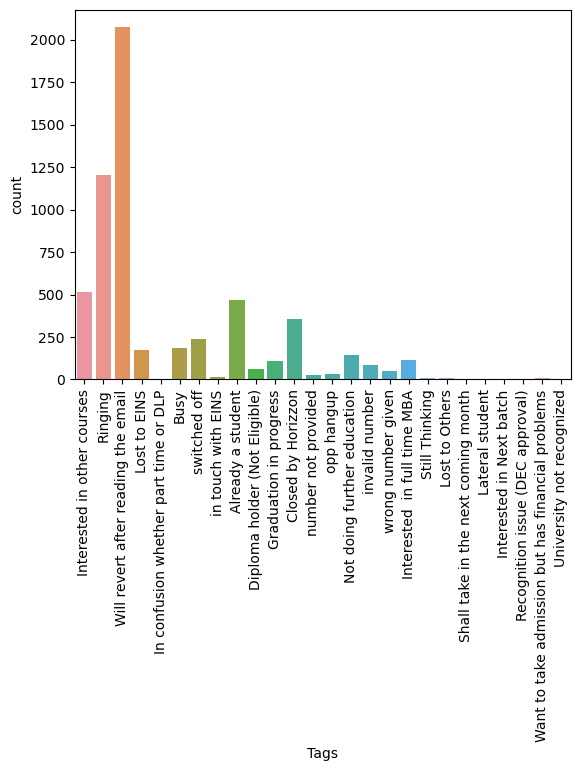

In [20]:
sns.countplot(df["Tags"])
plt.xticks(rotation=90)
plt.show()

### most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [21]:
df["Tags"] = df["Tags"].fillna(df["Tags"].mode()[0])

In [22]:
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

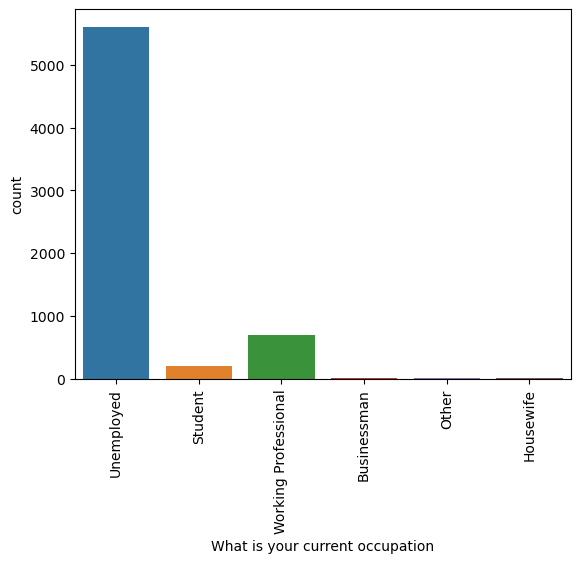

In [23]:
sns.countplot(df["What is your current occupation"])
plt.xticks(rotation=90)
plt.show()

### most values are 'Unemployed' , we can impute missing values in this column with this value

In [24]:
df["What is your current occupation"] = df["What is your current occupation"].fillna(df["What is your current occupation"].mode()[0])

In [25]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

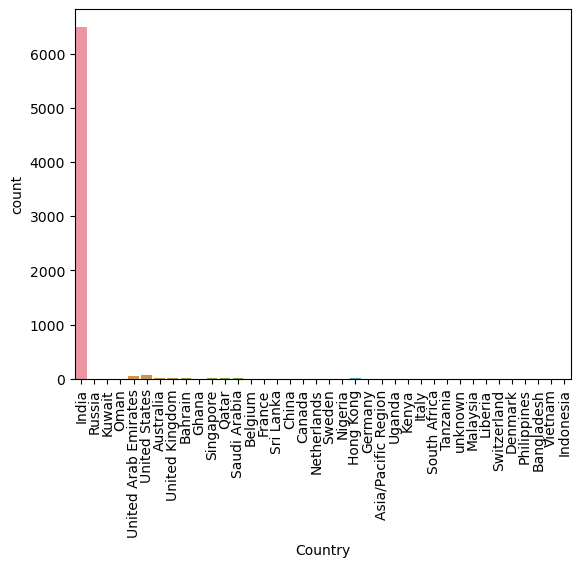

In [26]:
sns.countplot(df["Country"])
plt.xticks(rotation=90)
plt.show()

### most values are 'India' , we can impute missing values in this column with this value

In [27]:
df["Country"] = df["Country"].fillna(df["Country"].mode()[0])

In [28]:
df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

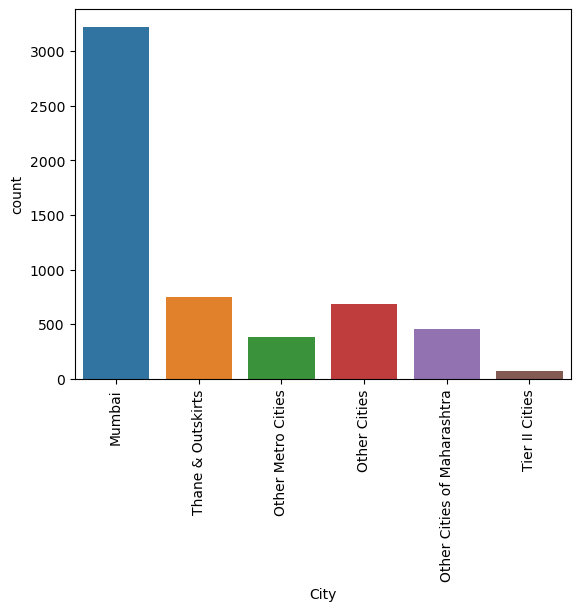

In [29]:
sns.countplot(df["City"])
plt.xticks(rotation=90)
plt.show()

### most values are 'Mumbai' , we can impute missing values in this column with this value

In [30]:
df["City"] = df["City"].fillna(df["City"].mode()[0])

In [31]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### no use of this column all values are "Better Career Prospects"

In [32]:
df =df.drop(columns=(["What matters most to you in choosing a course"]))

In [33]:
df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

### in this column there is a chance that they can be students or not having any specilization so we can fill null values with unknown

In [34]:
df["Specialization"] = df["Specialization"].replace(np.nan,"UnKnown")

In [35]:
df.isnull().sum()*100/len(df)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

### remaining colums having less than 2 percent of missing values .instead of inputing we can remove the rows

In [36]:
# Drop rows with null values
df.dropna(inplace=True)

In [37]:
df.isnull().sum()*100/len(df)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

# Exploratary Data Analysis

In [38]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

### In above we can see that there are two values "google" and "Google" which are same

In [39]:
df["Lead Source"] = df["Lead Source"].replace("google","Google")

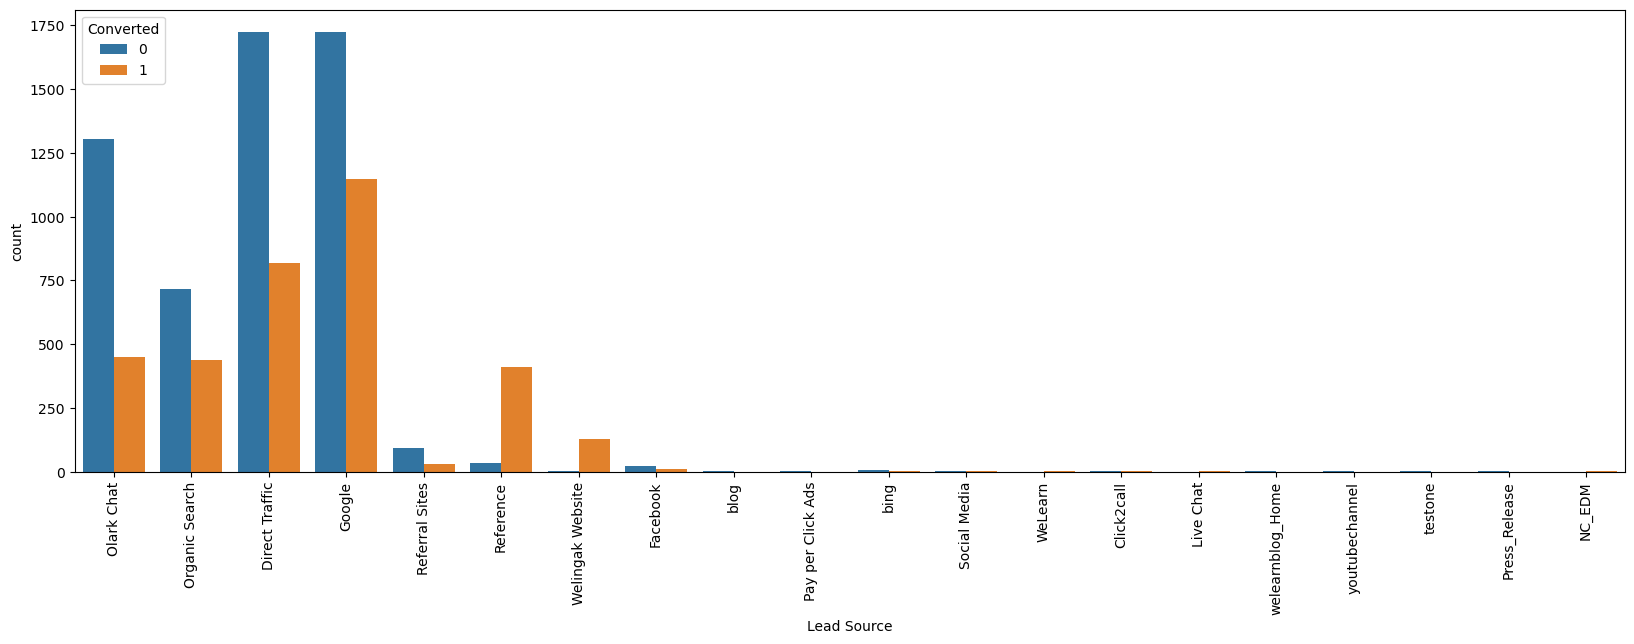

In [40]:
plt.figure(figsize=(20,6))
sns.countplot(x = "Lead Source",hue="Converted",data = df)
plt.xticks(rotation=90)
plt.show()

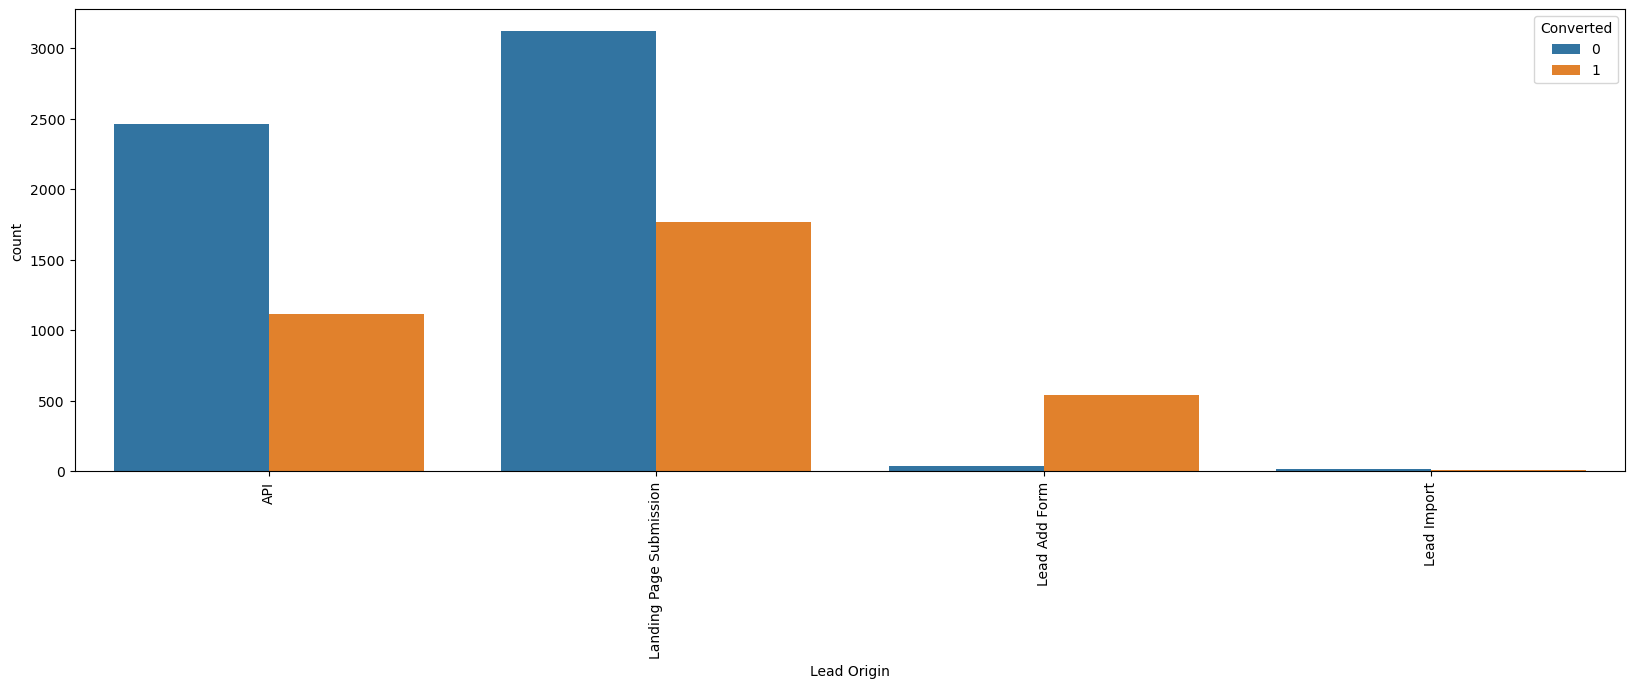

In [41]:
plt.figure(figsize=(20,6))
sns.countplot(x = "Lead Origin",hue="Converted",data = df)
plt.xticks(rotation=90)
plt.show()

### from above we can say that need high focus on Lead Add form -  Lead Add Form has more than 90% conversion rate but count of lead are not very high.

In [42]:
df["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [43]:
# df["Do Not Call"].value_counts()

In [44]:
# removing "Do Not Call" column since it has no use

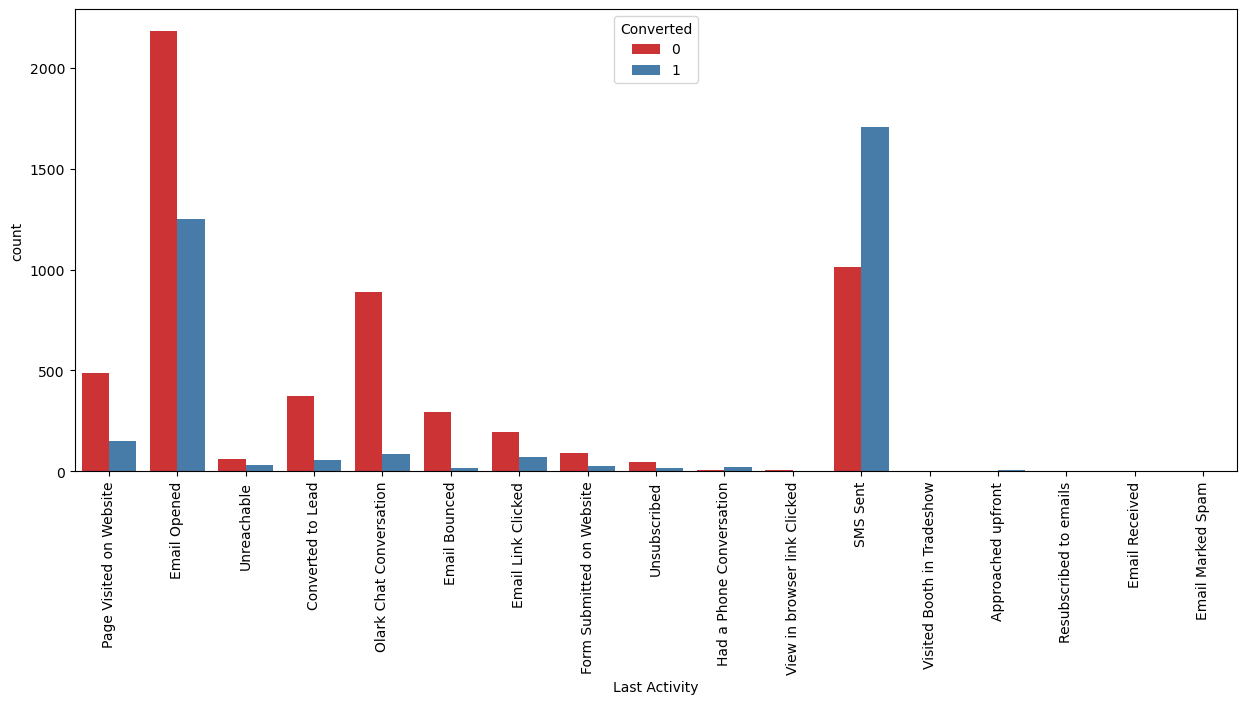

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Conversion rate for leads with last activity as SMS Sent is High

In [46]:
df["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [47]:
#removing "I agree to pay the amount through cheque" column since it has no use

In [48]:
df["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [49]:
#removing "Search" column since it has no use

In [50]:
df["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [51]:
##removing "Newspaper Article" column since it has no use

In [52]:
df["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [53]:
#removing "Get updates on DM Content" column since it has no use

In [54]:
df["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [55]:
#removing "Update me on Supply Chain Content" column since it has no use

In [56]:
df["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [57]:
#removing "Receive More Updates About Our Courses" column since it has no use

In [58]:
df["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [59]:
df[df["Digital Advertisement"] == "Yes"]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5193,6a8950c8-bc33-4bd0-a998-5ec260f4da03,610092,Landing Page Submission,Direct Traffic,No,No,0,20.0,814,2.5,Page Visited on Website,India,Healthcare Management,Unemployed,Yes,No,Yes,Yes,No,Yes,Yes,No,Will revert after reading the email,No,No,Other Metro Cities,No,Yes,Modified
6221,60384d8d-4171-4b63-99ed-258ed8b88d2f,602029,Landing Page Submission,Direct Traffic,No,No,0,9.0,352,9.0,SMS Sent,India,UnKnown,Unemployed,No,No,No,No,No,Yes,No,No,Ringing,No,No,Mumbai,No,No,SMS Sent
7140,98936b1b-f2c7-48cc-a8ed-4a49e54dc131,594705,Landing Page Submission,Direct Traffic,No,No,0,4.0,73,4.0,SMS Sent,India,Supply Chain Management,Unemployed,No,No,No,No,No,Yes,No,No,opp hangup,No,No,Mumbai,No,No,SMS Sent
8871,d0be0023-2511-4621-8a66-972bf64cfa35,582244,Landing Page Submission,Direct Traffic,No,No,1,3.0,1513,3.0,Email Opened,India,Operations Management,Unemployed,No,No,No,No,No,Yes,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [60]:
#removing "Digital Advertisement" column since it has no use

In [61]:
df["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [62]:
df[df["Newspaper"] == "Yes"]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3414,d8350bea-ec66-4c36-a2d0-630f8c0e0c93,627531,Landing Page Submission,Direct Traffic,No,No,0,10.0,1812,3.33,Email Opened,India,Finance Management,Unemployed,No,No,No,No,Yes,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened


In [63]:
#removing "Newspaper" column since it has no use

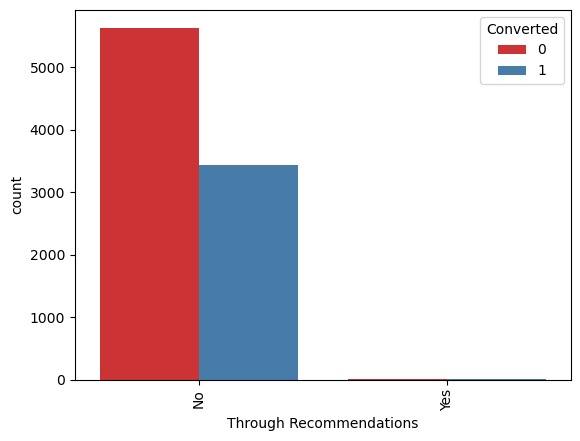

In [64]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [65]:
#removing "Through Recommendations" column since it has no use

In [66]:
df["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [67]:
df[df["X Education Forums"] == "Yes"]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5193,6a8950c8-bc33-4bd0-a998-5ec260f4da03,610092,Landing Page Submission,Direct Traffic,No,No,0,20.0,814,2.5,Page Visited on Website,India,Healthcare Management,Unemployed,Yes,No,Yes,Yes,No,Yes,Yes,No,Will revert after reading the email,No,No,Other Metro Cities,No,Yes,Modified


In [68]:
#removing "X Education Forums" column since it has no use

In [69]:
df["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [70]:
#removing "Magazine" column since it has no use

In [71]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [72]:
# df.drop(columns=["Through Recommendations","Tags","Country","Search","Newspaper Article","Do Not Call","Magazine","X Education Forums","Newspaper","Digital Advertisement","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],inplace=True)

df.drop(columns=["Through Recommendations","Tags","Country","Search","Newspaper Article","Magazine","X Education Forums","Newspaper","Digital Advertisement","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"],inplace=True)

In [73]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,UnKnown,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,UnKnown,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,UnKnown,Unemployed,Mumbai,Modified


In [74]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

## checking for outliers

<AxesSubplot:xlabel='TotalVisits'>

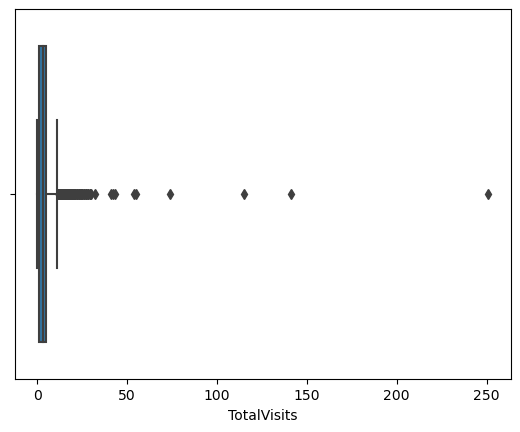

In [75]:
sns.boxplot(df["TotalVisits"])

### from above we can see there are outliers

In [76]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values

In [77]:
percentiles

array([ 0., 10.])

In [78]:
df["TotalVisits"] = df["TotalVisits"].apply(lambda x:percentiles[0] if x<=percentiles[0] else x)

In [79]:
df["TotalVisits"] = df["TotalVisits"].apply(lambda x:percentiles[1] if x>=percentiles[1] else x)

<AxesSubplot:xlabel='TotalVisits'>

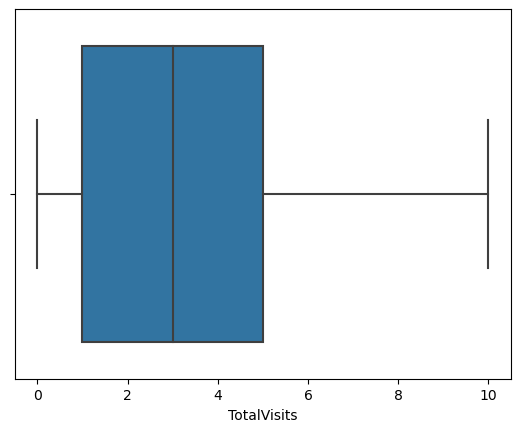

In [80]:
sns.boxplot(df["TotalVisits"])

<AxesSubplot:xlabel='Total Time Spent on Website'>

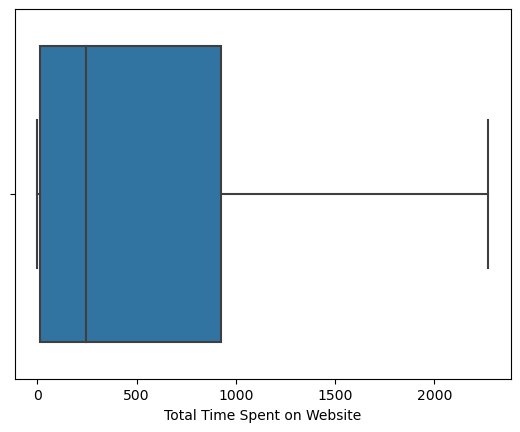

In [81]:
sns.boxplot(df["Total Time Spent on Website"])

### there are no outliers

<AxesSubplot:xlabel='Page Views Per Visit'>

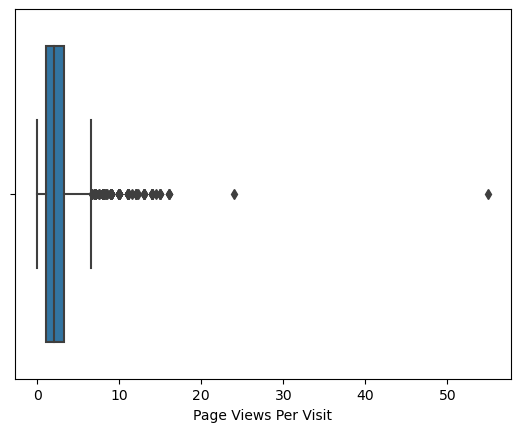

In [82]:
sns.boxplot(df["Page Views Per Visit"])

In [83]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values

In [84]:
percentiles

array([0., 6.])

In [85]:
df["Page Views Per Visit"] = df["Page Views Per Visit"].apply(lambda x:percentiles[1] if x>=percentiles[1] else x)

In [86]:
df["Page Views Per Visit"] = df["Page Views Per Visit"].apply(lambda x:percentiles[1] if x>=percentiles[1] else x)

<AxesSubplot:xlabel='Page Views Per Visit'>

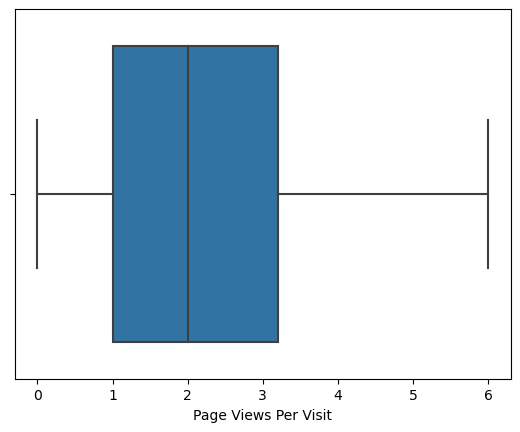

In [87]:
sns.boxplot(df["Page Views Per Visit"])

In [88]:


def yes_no_map(x):
    return x.map({'Yes': 1, "No": 0})

df[['Do Not Email', 'Do Not Call']] = df[['Do Not Email', 'Do Not Call']].apply(yes_no_map)

In [89]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,UnKnown,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,UnKnown,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,UnKnown,Unemployed,Mumbai,Modified


In [90]:
df.shape

(9074, 15)

## Both "Prospect ID" ans "Lead Number " unique IDs so we will remove any one column

In [91]:
df.drop(columns=["Prospect ID"],inplace=True)

In [92]:
data_types = df.dtypes

In [93]:
cat_colums = data_types[data_types == "object"].index.tolist()

In [94]:
cat_colums

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City',
 'Last Notable Activity']

In [95]:
df = pd.get_dummies(df, columns=cat_colums,drop_first=True)

In [97]:
df.shape

(9074, 88)

In [98]:
y = df.pop("Converted")

In [99]:
x_train,x_test,y_train,y_test =train_test_split(df,y,train_size=0.7,random_state=100)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 87)
(2723, 87)
(6351,)
(2723,)


In [101]:
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

In [102]:
x_train.drop(columns=["Lead Number"],inplace=True)

In [103]:
x_test.drop(columns=["Lead Number"],inplace=True)

In [104]:
x_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Receive

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()

In [107]:
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] =scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [108]:
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6351.000000,6351.000000,6351.000000
mean,0.320627,0.217585,0.379863
std,0.278748,0.244868,0.300183
min,0.000000,0.000000,0.000000
25%,0.100000,0.004492,0.166667
50%,0.300000,0.110961,0.333333
75%,0.500000,0.413522,0.555000
max,1.000000,1.000000,1.000000


In [109]:
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.178347,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.085355,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.619946,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,0.711590,0.416667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [110]:
lm = LogisticRegression()

In [111]:
rfe = RFE(estimator=lm,n_features_to_select=20)

In [112]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [113]:
list(zip(x_train.columns,rfe.ranking_,rfe.support_))

[('Do Not Email', 1, True),
 ('Do Not Call', 13, False),
 ('TotalVisits', 1, True),
 ('Total Time Spent on Website', 1, True),
 ('Page Views Per Visit', 1, True),
 ('Lead Origin_Landing Page Submission', 1, True),
 ('Lead Origin_Lead Add Form', 1, True),
 ('Lead Origin_Lead Import', 32, False),
 ('Lead Source_Direct Traffic', 2, False),
 ('Lead Source_Facebook', 50, False),
 ('Lead Source_Google', 4, False),
 ('Lead Source_Live Chat', 37, False),
 ('Lead Source_NC_EDM', 33, False),
 ('Lead Source_Olark Chat', 20, False),
 ('Lead Source_Organic Search', 3, False),
 ('Lead Source_Pay per Click Ads', 45, False),
 ('Lead Source_Press_Release', 44, False),
 ('Lead Source_Reference', 10, False),
 ('Lead Source_Referral Sites', 1, True),
 ('Lead Source_Social Media', 25, False),
 ('Lead Source_WeLearn', 67, False),
 ('Lead Source_Welingak Website', 1, True),
 ('Lead Source_bing', 57, False),
 ('Lead Source_blog', 27, False),
 ('Lead Source_testone', 40, False),
 ('Lead Source_welearnblog_Home

In [114]:
x_train = x_train[x_train.columns[rfe.support_]]

In [115]:
x_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3009,0,0.2,0.178347,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1012,1,0.2,0.085355,0.333333,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
9226,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4750,0,0.2,0.619946,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7987,0,0.5,0.711590,0.416667,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.5,0.363432,0.833333,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
82,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8199,0,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7077,0,0.5,0.206199,0.833333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
import statsmodels.api as sm

In [117]:
x_train_sm =sm.add_constant(x_train)

In [118]:
x_train_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3009,1.0,0,0.2,0.178347,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1012,1.0,1,0.2,0.085355,0.333333,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
9226,1.0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4750,1.0,0,0.2,0.619946,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7987,1.0,0,0.5,0.711590,0.416667,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [119]:
model=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())

In [120]:
model = model.fit()

In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Mon, 26 Jun 2023   Deviance:                       5186.2
Time:                        12:51:19   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0543      0.143      7.394      0.000       0.775       1.334
Do Not Email                                            -1.5647      0.202     -7.764      0.000      -1.960      -1.170
TotalVisits                                              0.7762      0.193      4.029      0.000       0.399       1.154
Total Time Spent on Website                              4.1571      0.158     26.379      0.000       3.848       4.466
Page Views Per Visit                                    -1.4394      0.195     -7.393      0.000      -1.821      -1.058
Lead Origin_Landing Page Submission                     -1.2976      0.124    -10.437      0.000      -1.541      -1.054
Lead Origin_Lead Add Form                                2.5527      0.231     11.071      0.000       2.101       3.005
Lead Source_Referral Sites                              -0.4566      0.333     -1.373      0.170      -1.108       0.195
Lead Source_Welingak Website                             2.6497      0.759      3.493      0.000       1.163       4.136
Last Activity_Converted to Lead                         -1.2487      0.227     -5.498      0.000      -1.694      -0.804
Last Activity_Email Bounced                             -1.3355      0.433     -3.086      0.002      -2.184      -0.487
Last Activity_Had a Phone Conversation                   1.7241      0.780      2.210      0.027       0.195       3.253
Last Activity_Olark Chat Conversation                   -1.2112      0.197     -6.164      0.000      -1.596      -0.826
Specialization_UnKnown                                  -1.1053      0.126     -8.793      0.000      -1.352      -0.859
What is your current occupation_Housewife               22.4809   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
What is your current occupation_Working Professional     2.6338      0.194     13.585      0.000       2.254       3.014
Last Notable Activity_Email Link Clicked                -1.8887      0.261     -7.245      0.000      -2.400      -1.378
Last Notable Activity_Email Opened                      -1.4767      0.089    -16.632      0.000      -1.651      -1.303
Last Notable Activity_Modified                          -1.7900      0.101    -17.752      0.000      -1.988      -1.592
Last Notable Activity_Olark Chat Conversation           -1.5098      0.378     -3.991      0.000      -2.251      -0.768
Last Notable Activity_Page Visited on Website           -2.0174      0.210     -9.607      0.000      -2.429      -1.606
========================================================================================================================
"""

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
VIF = pd.DataFrame()
VIF["Features"] = x_train.columns
vif = []
for i in range(x_train.shape[1]):
    vif.append(round(variance_inflation_factor(x_train.values,i),2))

VIF["VIF"] = vif
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF
    

,Features,VIF
3,Page Views Per Visit,7.60
1,TotalVisits,6.31
4,Lead Origin_Landing Page Submission,4.28
17,Last Notable Activity_Modified,2.75
12,Specialization_UnKnown,2.24
2,Total Time Spent on Website,2.10
11,Last Activity_Olark Chat Conversation,1.94
16,Last Notable Activity_Email Opened,1.90
0,Do Not Email,1.85
9,Last Activity_Email Bounced,1.78


In [124]:
#we will remove this column "What is your current occupation_Housewife" P>|z| >0

In [125]:
x_train.pop("What is your current occupation_Housewife")
x_train_sm.pop("What is your current occupation_Housewife")

3009    0
1012    0
9226    0
4750    0
7987    0
       ..
367     0
82      0
8199    0
7077    0
5754    0
Name: What is your current occupation_Housewife, Length: 6351, dtype: uint8

In [126]:
model2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Mon, 26 Jun 2023   Deviance:                       5194.0
Time:                        12:51:20   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0579      0.143      7.421      0.000       0.778       1.337
Do Not Email                                            -1.5658      0.202     -7.768      0.000      -1.961      -1.171
TotalVisits                                              0.7725      0.193      4.012      0.000       0.395       1.150
Total Time Spent on Website                              4.1575      0.157     26.401      0.000       3.849       4.466
Page Views Per Visit                                    -1.4439      0.195     -7.419      0.000      -1.825      -1.062
Lead Origin_Landing Page Submission                     -1.2959      0.124    -10.431      0.000      -1.539      -1.052
Lead Origin_Lead Add Form                                2.5673      0.230     11.146      0.000       2.116       3.019
Lead Source_Referral Sites                              -0.4553      0.333     -1.369      0.171      -1.107       0.197
Lead Source_Welingak Website                             2.6345      0.758      3.473      0.001       1.148       4.121
Last Activity_Converted to Lead                         -1.2499      0.227     -5.503      0.000      -1.695      -0.805
Last Activity_Email Bounced                             -1.3351      0.433     -3.085      0.002      -2.183      -0.487
Last Activity_Had a Phone Conversation                   1.7253      0.780      2.211      0.027       0.196       3.254
Last Activity_Olark Chat Conversation                   -1.2100      0.197     -6.157      0.000      -1.595      -0.825
Specialization_UnKnown                                  -1.1106      0.126     -8.838      0.000      -1.357      -0.864
What is your current occupation_Working Professional     2.6297      0.194     13.562      0.000       2.250       3.010
Last Notable Activity_Email Link Clicked                -1.8798      0.259     -7.245      0.000      -2.388      -1.371
Last Notable Activity_Email Opened                      -1.4701      0.089    -16.572      0.000      -1.644      -1.296
Last Notable Activity_Modified                          -1.7895      0.101    -17.747      0.000      -1.987      -1.592
Last Notable Activity_Olark Chat Conversation           -1.5091      0.378     -3.988      0.000      -2.251      -0.767
Last Notable Activity_Page Visited on Website           -2.0164      0.210     -9.602      0.000      -2.428      -1.605
========================================================================================================================
"""

In [127]:
VIF = pd.DataFrame()
VIF["Features"] = x_train.columns
vif = []
for i in range(x_train.shape[1]):
    vif.append(round(variance_inflation_factor(x_train.values,i),2))

VIF["VIF"] = vif
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

,Features,VIF
3,Page Views Per Visit,7.60
1,TotalVisits,6.31
4,Lead Origin_Landing Page Submission,4.28
16,Last Notable Activity_Modified,2.75
12,Specialization_UnKnown,2.24
2,Total Time Spent on Website,2.10
11,Last Activity_Olark Chat Conversation,1.94
15,Last Notable Activity_Email Opened,1.89
0,Do Not Email,1.85
9,Last Activity_Email Bounced,1.78


In [128]:
#we will remove this column "Lead Source_Referral Sites" P>|z| >0.05

In [129]:
x_train.pop("Lead Source_Referral Sites")
x_train_sm.pop("Lead Source_Referral Sites")

3009    0
1012    0
9226    0
4750    0
7987    0
       ..
367     1
82      0
8199    0
7077    0
5754    0
Name: Lead Source_Referral Sites, Length: 6351, dtype: uint8

In [130]:
model3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.0
Date:                Mon, 26 Jun 2023   Deviance:                       5195.9
Time:                        12:51:20   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0640      0.142      7.469      0.000       0.785       1.343
Do Not Email                                            -1.5668      0.202     -7.765      0.000      -1.962      -1.171
TotalVisits                                              0.7601      0.192      3.956      0.000       0.384       1.137
Total Time Spent on Website                              4.1574      0.157     26.409      0.000       3.849       4.466
Page Views Per Visit                                    -1.4587      0.194     -7.509      0.000      -1.839      -1.078
Lead Origin_Landing Page Submission                     -1.2879      0.124    -10.381      0.000      -1.531      -1.045
Lead Origin_Lead Add Form                                2.5692      0.230     11.153      0.000       2.118       3.021
Lead Source_Welingak Website                             2.6387      0.759      3.479      0.001       1.152       4.125
Last Activity_Converted to Lead                         -1.2528      0.227     -5.521      0.000      -1.698      -0.808
Last Activity_Email Bounced                             -1.3324      0.433     -3.078      0.002      -2.181      -0.484
Last Activity_Had a Phone Conversation                   1.7134      0.784      2.186      0.029       0.177       3.249
Last Activity_Olark Chat Conversation                   -1.2115      0.197     -6.161      0.000      -1.597      -0.826
Specialization_UnKnown                                  -1.1207      0.125     -8.936      0.000      -1.367      -0.875
What is your current occupation_Working Professional     2.6229      0.194     13.522      0.000       2.243       3.003
Last Notable Activity_Email Link Clicked                -1.8829      0.259     -7.263      0.000      -2.391      -1.375
Last Notable Activity_Email Opened                      -1.4723      0.089    -16.599      0.000      -1.646      -1.298
Last Notable Activity_Modified                          -1.7937      0.101    -17.799      0.000      -1.991      -1.596
Last Notable Activity_Olark Chat Conversation           -1.5006      0.378     -3.966      0.000      -2.242      -0.759
Last Notable Activity_Page Visited on Website           -2.0229      0.210     -9.635      0.000      -2.434      -1.611
========================================================================================================================
"""

In [131]:
VIF = pd.DataFrame()
VIF["Features"] = x_train.columns
vif = []
for i in range(x_train.shape[1]):
    vif.append(round(variance_inflation_factor(x_train.values,i),2))

VIF["VIF"] = vif
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

,Features,VIF
3,Page Views Per Visit,7.57
1,TotalVisits,6.29
4,Lead Origin_Landing Page Submission,4.23
15,Last Notable Activity_Modified,2.75
11,Specialization_UnKnown,2.23
2,Total Time Spent on Website,2.10
10,Last Activity_Olark Chat Conversation,1.94
14,Last Notable Activity_Email Opened,1.89
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.78


In [132]:
# we will remove this column "Page Views Per Visit" which has high VIF

In [133]:
x_train.pop("Page Views Per Visit")
x_train_sm.pop("Page Views Per Visit")

3009    0.333333
1012    0.333333
9226    0.000000
4750    0.333333
7987    0.416667
          ...   
367     0.833333
82      0.000000
8199    0.000000
7077    0.833333
5754    1.000000
Name: Page Views Per Visit, Length: 6351, dtype: float64

In [134]:
model4=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.0
Date:                Mon, 26 Jun 2023   Deviance:                       5254.0
Time:                        12:51:21   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8571      0.138      6.190      0.000       0.586       1.129
Do Not Email                                            -1.5893      0.200     -7.962      0.000      -1.981      -1.198
TotalVisits                                             -0.1720      0.148     -1.163      0.245      -0.462       0.118
Total Time Spent on Website                              4.0204      0.154     26.030      0.000       3.718       4.323
Lead Origin_Landing Page Submission                     -1.4456      0.122    -11.885      0.000      -1.684      -1.207
Lead Origin_Lead Add Form                                2.7241      0.229     11.874      0.000       2.274       3.174
Lead Source_Welingak Website                             2.6150      0.758      3.448      0.001       1.128       4.102
Last Activity_Converted to Lead                         -1.1821      0.226     -5.227      0.000      -1.625      -0.739
Last Activity_Email Bounced                             -1.2027      0.429     -2.806      0.005      -2.043      -0.363
Last Activity_Had a Phone Conversation                   1.6482      0.780      2.114      0.035       0.120       3.176
Last Activity_Olark Chat Conversation                   -1.1439      0.197     -5.816      0.000      -1.529      -0.758
Specialization_UnKnown                                  -1.0859      0.124     -8.726      0.000      -1.330      -0.842
What is your current occupation_Working Professional     2.5953      0.193     13.440      0.000       2.217       2.974
Last Notable Activity_Email Link Clicked                -1.7765      0.256     -6.951      0.000      -2.277      -1.276
Last Notable Activity_Email Opened                      -1.4258      0.088    -16.247      0.000      -1.598      -1.254
Last Notable Activity_Modified                          -1.7685      0.100    -17.696      0.000      -1.964      -1.573
Last Notable Activity_Olark Chat Conversation           -1.3859      0.374     -3.706      0.000      -2.119      -0.653
Last Notable Activity_Page Visited on Website           -1.7063      0.203     -8.423      0.000      -2.103      -1.309
========================================================================================================================
"""

In [135]:
VIF = pd.DataFrame()
VIF["Features"] = x_train.columns
vif = []
for i in range(x_train.shape[1]):
    vif.append(round(variance_inflation_factor(x_train.values,i),2))

VIF["VIF"] = vif
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

,Features,VIF
3,Lead Origin_Landing Page Submission,3.64
1,TotalVisits,3.27
14,Last Notable Activity_Modified,2.74
10,Specialization_UnKnown,2.19
2,Total Time Spent on Website,2.07
9,Last Activity_Olark Chat Conversation,1.94
13,Last Notable Activity_Email Opened,1.89
0,Do Not Email,1.85
7,Last Activity_Email Bounced,1.78
4,Lead Origin_Lead Add Form,1.50


In [136]:
#we will remove this column"Total Visit" P>|z| is high

In [137]:
x_train.pop("TotalVisits")
x_train_sm.pop("TotalVisits")

3009    0.2
1012    0.2
9226    0.0
4750    0.2
7987    0.5
       ... 
367     0.5
82      0.0
8199    0.0
7077    0.5
5754    0.6
Name: TotalVisits, Length: 6351, dtype: float64

In [138]:
model5=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model5 = model5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.7
Date:                Mon, 26 Jun 2023   Deviance:                       5255.4
Time:                        12:51:21   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8071      0.132      6.137      0.000       0.549       1.065
Do Not Email                                            -1.5868      0.199     -7.954      0.000      -1.978      -1.196
Total Time Spent on Website                              3.9846      0.151     26.375      0.000       3.688       4.281
Lead Origin_Landing Page Submission                     -1.4596      0.121    -12.061      0.000      -1.697      -1.222
Lead Origin_Lead Add Form                                2.7653      0.227     12.201      0.000       2.321       3.210
Lead Source_Welingak Website                             2.6065      0.758      3.437      0.001       1.120       4.093
Last Activity_Converted to Lead                         -1.1507      0.224     -5.131      0.000      -1.590      -0.711
Last Activity_Email Bounced                             -1.1927      0.429     -2.781      0.005      -2.033      -0.352
Last Activity_Had a Phone Conversation                   1.6241      0.780      2.082      0.037       0.095       3.153
Last Activity_Olark Chat Conversation                   -1.1366      0.197     -5.776      0.000      -1.522      -0.751
Specialization_UnKnown                                  -1.0672      0.123     -8.652      0.000      -1.309      -0.825
What is your current occupation_Working Professional     2.5959      0.193     13.442      0.000       2.217       2.974
Last Notable Activity_Email Link Clicked                -1.7800      0.256     -6.964      0.000      -2.281      -1.279
Last Notable Activity_Email Opened                      -1.4291      0.088    -16.292      0.000      -1.601      -1.257
Last Notable Activity_Modified                          -1.7691      0.100    -17.711      0.000      -1.965      -1.573
Last Notable Activity_Olark Chat Conversation           -1.3944      0.375     -3.721      0.000      -2.129      -0.660
Last Notable Activity_Page Visited on Website           -1.7517      0.199     -8.824      0.000      -2.141      -1.363
========================================================================================================================
"""

In [139]:
VIF = pd.DataFrame()
VIF["Features"] = x_train.columns
vif = []
for i in range(x_train.shape[1]):
    vif.append(round(variance_inflation_factor(x_train.values,i),2))

VIF["VIF"] = vif
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,2.88
13,Last Notable Activity_Modified,2.69
9,Specialization_UnKnown,2.15
8,Last Activity_Olark Chat Conversation,1.93
1,Total Time Spent on Website,1.88
0,Do Not Email,1.85
12,Last Notable Activity_Email Opened,1.84
6,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.49
4,Lead Source_Welingak Website,1.37


In [140]:
#we will remove this column "Last Activity_Had a Phone Conversation" P>|z| is high

In [141]:
x_train.pop("Last Activity_Had a Phone Conversation")
x_train_sm.pop("Last Activity_Had a Phone Conversation")

3009    0
1012    0
9226    0
4750    0
7987    0
       ..
367     0
82      0
8199    0
7077    0
5754    0
Name: Last Activity_Had a Phone Conversation, Length: 6351, dtype: uint8

In [142]:
model6=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model6 = model6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.4
Date:                Mon, 26 Jun 2023   Deviance:                       5260.8
Time:                        12:51:21   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8178      0.131      6.230      0.000       0.561       1.075
Do Not Email                                            -1.5920      0.200     -7.975      0.000      -1.983      -1.201
Total Time Spent on Website                              3.9850      0.151     26.392      0.000       3.689       4.281
Lead Origin_Landing Page Submission                     -1.4608      0.121    -12.083      0.000      -1.698      -1.224
Lead Origin_Lead Add Form                                2.7602      0.227     12.179      0.000       2.316       3.204
Lead Source_Welingak Website                             2.6077      0.758      3.439      0.001       1.121       4.094
Last Activity_Converted to Lead                         -1.1588      0.224     -5.169      0.000      -1.598      -0.719
Last Activity_Email Bounced                             -1.1966      0.429     -2.789      0.005      -2.037      -0.356
Last Activity_Olark Chat Conversation                   -1.1448      0.197     -5.820      0.000      -1.530      -0.759
Specialization_UnKnown                                  -1.0688      0.123     -8.672      0.000      -1.310      -0.827
What is your current occupation_Working Professional     2.5931      0.193     13.428      0.000       2.215       2.972
Last Notable Activity_Email Link Clicked                -1.7893      0.256     -7.002      0.000      -2.290      -1.288
Last Notable Activity_Email Opened                      -1.4385      0.088    -16.416      0.000      -1.610      -1.267
Last Notable Activity_Modified                          -1.7704      0.100    -17.745      0.000      -1.966      -1.575
Last Notable Activity_Olark Chat Conversation           -1.3955      0.375     -3.725      0.000      -2.130      -0.661
Last Notable Activity_Page Visited on Website           -1.7609      0.198     -8.872      0.000      -2.150      -1.372
========================================================================================================================
"""

In [143]:
VIF = pd.DataFrame()
VIF["Features"] = x_train.columns
vif = []
for i in range(x_train.shape[1]):
    vif.append(round(variance_inflation_factor(x_train.values,i),2))

VIF["VIF"] = vif
VIF = VIF.sort_values(by="VIF",ascending=False)
VIF

,Features,VIF
2,Lead Origin_Landing Page Submission,2.88
12,Last Notable Activity_Modified,2.69
8,Specialization_UnKnown,2.15
7,Last Activity_Olark Chat Conversation,1.93
1,Total Time Spent on Website,1.88
0,Do Not Email,1.85
11,Last Notable Activity_Email Opened,1.83
6,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.49
4,Lead Source_Welingak Website,1.37


### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-6 is our final model. We have 15 variables in our final model.

In [144]:

y_train_pred = model6.predict(x_train_sm)

In [145]:
y_train_pred

3009    0.202489
1012    0.172644
9226    0.116987
4750    0.861462
7987    0.604037
          ...   
367     0.360541
82      0.835028
8199    0.924793
7077    0.221005
5754    0.390755
Length: 6351, dtype: float64

In [146]:
x_train.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_UnKnown,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3009,0,0.178347,1,0,0,0,0,0,0,0,0,1,0,0,0
1012,1,0.085355,1,0,0,0,1,0,1,1,0,0,0,0,0
9226,0,0.000000,0,0,0,0,0,0,1,0,0,0,1,0,0
4750,0,0.619946,1,0,0,0,0,0,0,0,0,0,0,0,0
7987,0,0.711590,1,0,0,0,0,0,0,0,0,0,1,0,0


In [147]:
train_df = pd.DataFrame()

In [148]:
train_df["Lead Number"] = x_train_copy["Lead Number"]

In [149]:
train_df["Converted"] = y_train

In [150]:
train_df["y_train_pred"] = y_train_pred

In [151]:
train_df

,Lead Number,Converted,y_train_pred
3009,630949,0,0.202489
1012,649355,0,0.172644
9226,579735,0,0.116987
4750,614238,1,0.861462
7987,588625,1,0.604037
...,...,...,...
367,656527,0,0.360541
82,659704,1,0.835028
8199,587303,0,0.924793
7077,595263,0,0.221005


# first we choose cut-off probability point  0.5 to find the predicted labels

In [152]:
train_df["pred_converted"] = train_df["y_train_pred"].apply(lambda x:1 if x>=0.5 else 0)

In [153]:
train_df

,Lead Number,Converted,y_train_pred,pred_converted
3009,630949,0,0.202489,0
1012,649355,0,0.172644,0
9226,579735,0,0.116987,0
4750,614238,1,0.861462,1
7987,588625,1,0.604037,1
...,...,...,...,...
367,656527,0,0.360541,0
82,659704,1,0.835028,1
8199,587303,0,0.924793,1
7077,595263,0,0.221005,0


In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
conf_matrix = confusion_matrix(train_df["Converted"],train_df["pred_converted"])
conf_matrix

array([[3454,  451],
       [ 802, 1644]], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
accuracy_score(train_df["Converted"],train_df["pred_converted"])

0.8027082349236341

# accuracy Score 80%

In [158]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [159]:
sensitivity = TP/(TP+FN)

In [160]:
sensitivity

0.6721177432542927

## Sensitivity score 67%

In [161]:
specificity = TN/(TN+FP)

In [162]:
specificity

0.8845070422535212

## specificity score 88%

In [163]:
precision = TP/(TP+FP)

In [164]:
precision

0.7847255369928401

## Precision score 78%

In [165]:
from sklearn import metrics

In [166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( train_df["Converted"],train_df["y_train_pred"], drop_intermediate = False )

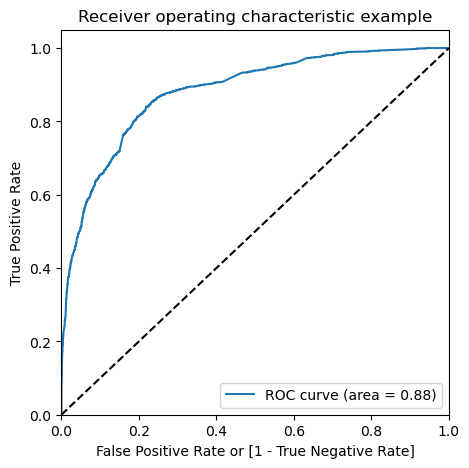

In [168]:
draw_roc(train_df["Converted"],train_df["y_train_pred"])

## Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

In [169]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_df[i]= train_df.y_train_pred.map(lambda x: 1 if x > i else 0)
train_df.head()

,Lead Number,Converted,y_train_pred,pred_converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,630949,0,0.202489,0,1,1,1,0,0,0,0,0,0,0
1012,649355,0,0.172644,0,1,1,0,0,0,0,0,0,0,0
9226,579735,0,0.116987,0,1,1,0,0,0,0,0,0,0,0
4750,614238,1,0.861462,1,1,1,1,1,1,1,1,1,1,0
7987,588625,1,0.604037,1,1,1,1,1,1,1,1,0,0,0


In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_df.Converted, train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.569202  0.980785  0.311396
0.2   0.2  0.762557  0.890433  0.682458
0.3   0.3  0.798142  0.856500  0.761588
0.4   0.4  0.807117  0.790270  0.817670
0.5   0.5  0.802708  0.672118  0.884507
0.6   0.6  0.798614  0.594440  0.926504
0.7   0.7  0.780979  0.510630  0.950320
0.8   0.8  0.761770  0.423549  0.973624
0.9   0.9  0.712801  0.271872  0.988988


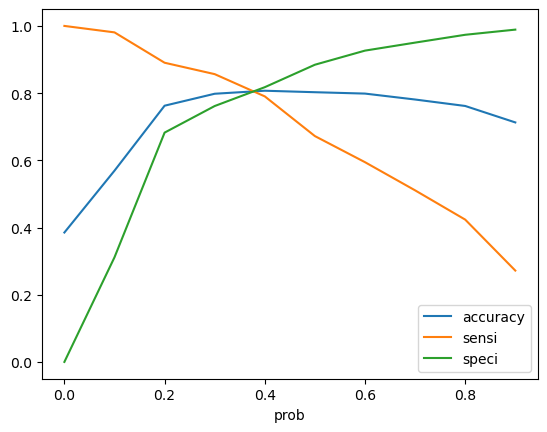

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [172]:
train_df["pred_converted"] = train_df["y_train_pred"].apply(lambda x:1 if x>=0.36 else 0)

In [173]:
accuracy_score(train_df["Converted"],train_df["pred_converted"])

0.8027082349236341

In [174]:
conf_matrix = confusion_matrix(train_df["Converted"],train_df["pred_converted"])
conf_matrix

array([[3086,  819],
       [ 434, 2012]], dtype=int64)

In [175]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8225674570727719

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.790268886043534

In [178]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.20973111395646607


In [179]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7107029318262098


In [180]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8767045454545455


## Precision and Recall

In [181]:
##### Precision
TP / (TP + FP)

0.7107029318262098

In [182]:
### recall
TP / (TP + FN)

0.8225674570727719

In [183]:
from sklearn.metrics import precision_recall_curve

In [184]:
p, r, thresholds = precision_recall_curve(train_df.Converted, train_df.y_train_pred)

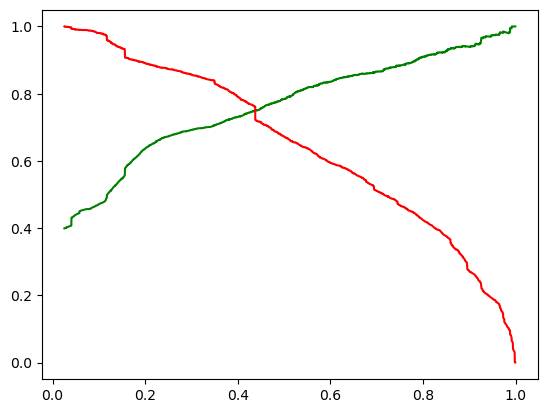

In [185]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set


In [186]:
x_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UnKnown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,4.0,157,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,2.0,74,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,6.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [187]:
x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] =scaler.transform(x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [188]:
x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2723.000000,2723.000000,2723.000000
mean,0.315828,0.215404,0.372512
std,0.276477,0.245176,0.294524
min,0.000000,0.000000,0.000000
25%,0.100000,0.005391,0.166667
50%,0.300000,0.108266,0.333333
75%,0.500000,0.416891,0.500000
max,1.000000,1.020665,1.000000


In [189]:
x_test.shape

(2723, 86)

In [190]:
x_test = x_test[x_test.columns[rfe.support_]]


In [191]:
x_test.shape

(2723, 20)

In [192]:
x_test.pop("Page Views Per Visit")

3271    0.666667
1490    0.833333
7936    0.333333
4216    0.000000
3830    1.000000
          ...   
850     0.250000
2879    0.333333
6501    1.000000
7155    0.500000
376     0.666667
Name: Page Views Per Visit, Length: 2723, dtype: float64

In [193]:
x_test.pop("What is your current occupation_Housewife")

3271    0
1490    0
7936    0
4216    0
3830    0
       ..
850     0
2879    0
6501    0
7155    0
376     0
Name: What is your current occupation_Housewife, Length: 2723, dtype: uint8

In [194]:
x_test.pop("TotalVisits")

3271    0.4
1490    0.5
7936    0.2
4216    0.0
3830    0.8
       ... 
850     0.3
2879    0.2
6501    0.8
7155    0.3
376     0.4
Name: TotalVisits, Length: 2723, dtype: float64

In [195]:
x_test.pop("Lead Source_Referral Sites")

3271    0
1490    0
7936    0
4216    0
3830    0
       ..
850     0
2879    0
6501    0
7155    0
376     0
Name: Lead Source_Referral Sites, Length: 2723, dtype: uint8

In [196]:
x_test.pop("Last Activity_Had a Phone Conversation")

3271    0
1490    0
7936    0
4216    0
3830    0
       ..
850     0
2879    0
6501    0
7155    0
376     0
Name: Last Activity_Had a Phone Conversation, Length: 2723, dtype: uint8

In [197]:
x_test_sm = sm.add_constant(x_test)

In [198]:
y_test_predicted = model6.predict(x_test_sm)

In [199]:
test_df = pd.DataFrame()
test_df["Lead Number"] = x_test_copy["Lead Number"]

In [200]:
test_df["Converted"] = y_test

In [201]:
test_df["y_test_pred"] = y_test_predicted

In [202]:
test_df

,Lead Number,Converted,y_test_pred
3271,628652,0,0.196488
1490,644500,1,0.961587
7936,588935,0,0.174081
4216,619437,1,0.859084
3830,623381,0,0.143327
...,...,...,...
850,651517,0,0.110263
2879,632055,0,0.074626
6501,600013,1,0.851565
7155,594617,0,0.183712


In [203]:
test_df["pred_converted"] = test_df["y_test_pred"].apply(lambda x:1 if x>=0.35 else 0)

In [204]:
accuracy_score(test_df["Converted"],test_df["pred_converted"])

0.7965479250826295

# Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

In [205]:
confusion2 = metrics.confusion_matrix(test_df["Converted"],test_df["pred_converted"])
confusion2

array([[1369,  365],
       [ 189,  800]], dtype=int64)

In [206]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8088978766430738

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.7895040369088812

# Our model is good .accuracy of our model in test set is same as train set.

# Finding out the Important Features from our final model:

In [209]:
model6.params.sort_values(ascending=False)

Total Time Spent on Website                             3.984967
Lead Origin_Lead Add Form                               2.760233
Lead Source_Welingak Website                            2.607691
What is your current occupation_Working Professional    2.593145
const                                                   0.817840
Specialization_UnKnown                                 -1.068751
Last Activity_Olark Chat Conversation                  -1.144779
Last Activity_Converted to Lead                        -1.158781
Last Activity_Email Bounced                            -1.196555
Last Notable Activity_Olark Chat Conversation          -1.395539
Last Notable Activity_Email Opened                     -1.438539
Lead Origin_Landing Page Submission                    -1.460818
Do Not Email                                           -1.592001
Last Notable Activity_Page Visited on Website          -1.760938
Last Notable Activity_Modified                         -1.770371
Last Notable Activity_Ema

# Recommendations:
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

- The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

- The company should not make calls to the leads whose Specialization was "Unknown" as they are not likely to get converted.

- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.